File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000049.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000051.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000060.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000062.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000064.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000066.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000068.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000070.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn000073.wav. Skipping...
File not found: /Users/hannatoenbreker/AAI/RTL-project/rtl/files/recordings/fn0000

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (2).

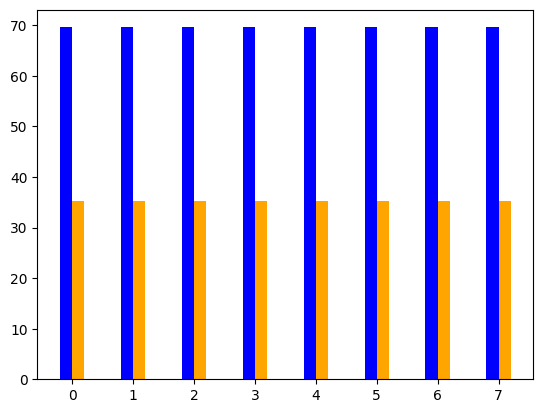

In [28]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from evaluate_model import get_error_rate

subgroup_1 = get_error_rate(1)
subgroup_2 = get_error_rate(2)

data = pd.concat([subgroup_1, subgroup_2], ignore_index=True)
data.head(10)
base = [[1, 35.3], [2, 18.4], [3,  55.1], [4, 56.9], [5, 24.2]]
hmi = [[1, 43.4], [2, 35.3], [3, 61.6], [4, 61.3], [5, 39.5]]
baseline = pd.DataFrame(base, columns=['subgroup', 'baseline'])

def get_mean(df):
    df['wer'] = df['wer'].apply(lambda x: x*100)
    df.groupby('subgroup')['wer'].mean() 
    df = df.merge(baseline, how='left', on='subgroup')
    return df

def launch_gradio(df):
    wer = plt.figure(1)
    for ind in df.index:
        X_axis_wer = np.arange(len(df))
        print(X_axis_wer)
        plt.bar(X_axis_wer - 0.1, df['wer'][ind], 0.2, label = 'wer', color='blue')
        plt.bar(X_axis_wer + 0.1, df['baseline'][ind], 0.2, label = 'baseline', color='orange')
        plt.xticks(X_axis_wer, [1,2])
    plt.xlabel("Group")
    plt.ylabel("Word error rate")
    plt.title("Whisper subgroup comparison", fontsize=14, fontweight='bold')
    plt.grid(False, 'both', 'x')
    plt.grid(True, 'both', 'y')
    plt.legend()
    plt.ylim(0, 100)

    cer = plt.figure(2)
    for ind in df.index:
        X_axis_cer = np.arange(len(df))
        plt.bar(X_axis_cer, df['wer'][ind], 0.4, label = 'cer')
        plt.xticks(X_axis_cer, df['subgroup'])
    plt.xlabel("Group")
    plt.ylabel("Character error rate")
    plt.title("Whisper subgroup comparison", fontsize=14, fontweight='bold')
    plt.grid(False, 'both', 'x')
    plt.grid(True, 'both', 'y')
    plt.legend()
    plt.ylim(0, 100)

    with gr.Blocks(theme=gr.themes.Soft()) as demo:
        gr.Markdown(
        """
        # Model card
        In this page we visualize the results of our whisper model (large-v2) 
        We measure the results by the Word Error Rate and the Character Error Rate
        These values are compared with a baseline. 
        """
        )
        with gr.Tabs():
            with gr.TabItem("WER"):
                gr.Plot(wer)
            with gr.TabItem("CER"):
                gr.Plot(cer)

    if __name__ == "__main__":
        demo.launch()

launch_gradio(get_mean(data))
